In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_excel("./Working/Evaluation_model.xlsx")

In [236]:
df = df[df.columns[1:]]

In [237]:
df

,backbone,model,Time_training,loss,Iou_score,F1_score
0,mobilenetv2,Linknet,2178.946642,0.465985,0.509271,0.58436
1,efficientnetb3,Linknet,3015.350176,0.447298,0.521443,0.59888
2,inceptionv3,Linknet,2318.630428,0.455518,0.515724,0.58985
3,resnet50,Linknet,2392.091974,0.442126,0.526585,0.60407
4,vgg16,Linknet,3602.742987,0.486155,0.494493,0.56666
5,resnet50,FPN,5574.922504,0.429762,0.536333,0.61278
6,vgg16,FPN,4756.101279,0.424975,0.544290,0.62030
7,vgg16,Unet,4716.292528,0.450795,0.524129,0.60033
8,resnet50,Unet,2754.380667,0.436002,0.532806,0.61009
9,mobilenetv2,Unet,2111.109734,0.441323,0.526182,0.60400


In [238]:
df.sort_values('Iou_score',axis = 0,ascending=False)

,backbone,model,Time_training,loss,Iou_score,F1_score
6,vgg16,FPN,4756.101279,0.424975,0.544290,0.62030
13,efficientnetb3,FPN,5052.327916,0.428663,0.537585,0.61721
12,efficientnetb3,Unet,3795.621106,0.429767,0.537205,0.61505
5,resnet50,FPN,5574.922504,0.429762,0.536333,0.61278
11,inceptionv3,FPN,4416.651027,0.433190,0.534531,0.60840
8,resnet50,Unet,2754.380667,0.436002,0.532806,0.61009
10,mobilenetv2,FPN,3336.091649,0.434233,0.532188,0.60894
14,inceptionv3,Unet,8913.769664,0.443069,0.527323,0.60329
3,resnet50,Linknet,2392.091974,0.442126,0.526585,0.60407
9,mobilenetv2,Unet,2111.109734,0.441323,0.526182,0.60400


In [239]:
df.sort_values('F1_score',axis = 0,ascending=False)

,backbone,model,Time_training,loss,Iou_score,F1_score
6,vgg16,FPN,4756.101279,0.424975,0.544290,0.62030
13,efficientnetb3,FPN,5052.327916,0.428663,0.537585,0.61721
12,efficientnetb3,Unet,3795.621106,0.429767,0.537205,0.61505
5,resnet50,FPN,5574.922504,0.429762,0.536333,0.61278
8,resnet50,Unet,2754.380667,0.436002,0.532806,0.61009
10,mobilenetv2,FPN,3336.091649,0.434233,0.532188,0.60894
11,inceptionv3,FPN,4416.651027,0.433190,0.534531,0.60840
3,resnet50,Linknet,2392.091974,0.442126,0.526585,0.60407
9,mobilenetv2,Unet,2111.109734,0.441323,0.526182,0.60400
14,inceptionv3,Unet,8913.769664,0.443069,0.527323,0.60329


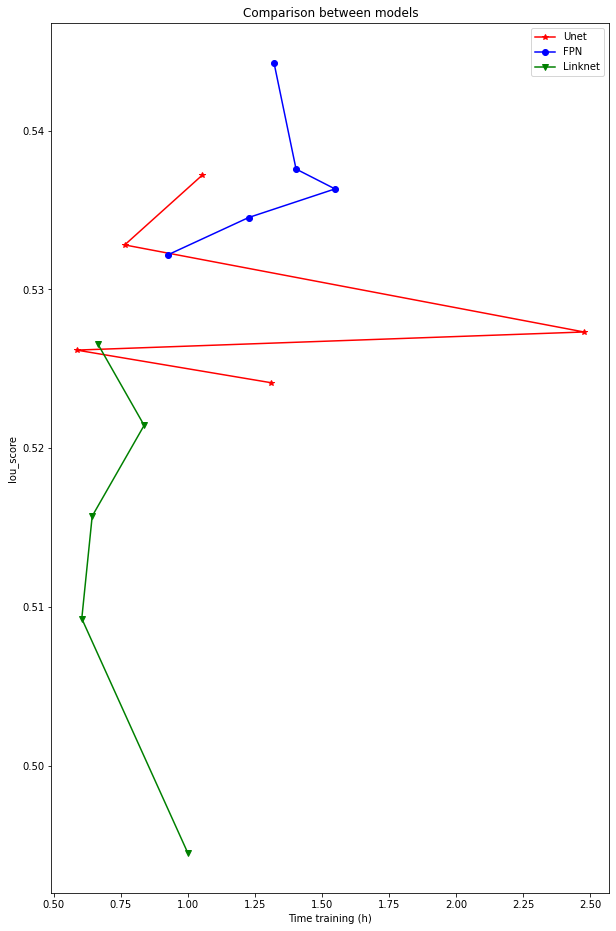

In [240]:
plt.figure(figsize=(10,16))
plt.plot(df.sort_values('Iou_score',axis = 0,ascending=False).Time_training[df.model == 'Unet']/3600, df.sort_values('Iou_score',axis = 0,ascending=False).Iou_score[df.model == 'Unet'],marker='*',color='r',)
plt.plot(df.sort_values('Iou_score',axis = 0,ascending=False).Time_training[df.model == 'FPN']/3600, df.sort_values('Iou_score',axis = 0,ascending=False).Iou_score[df.model == 'FPN'],marker='o',color='b')
plt.plot(df.sort_values('Iou_score',axis = 0,ascending=False).Time_training[df.model == 'Linknet']/3600, df.sort_values('Iou_score',axis = 0,ascending=False).Iou_score[df.model == 'Linknet'],marker='v',color='g')
plt.legend(['Unet','FPN','Linknet'])
plt.xlabel('Time training (h)')
plt.ylabel('Iou_score')
plt.title('Comparison between models')
plt.savefig('IOU_timetraining.png')

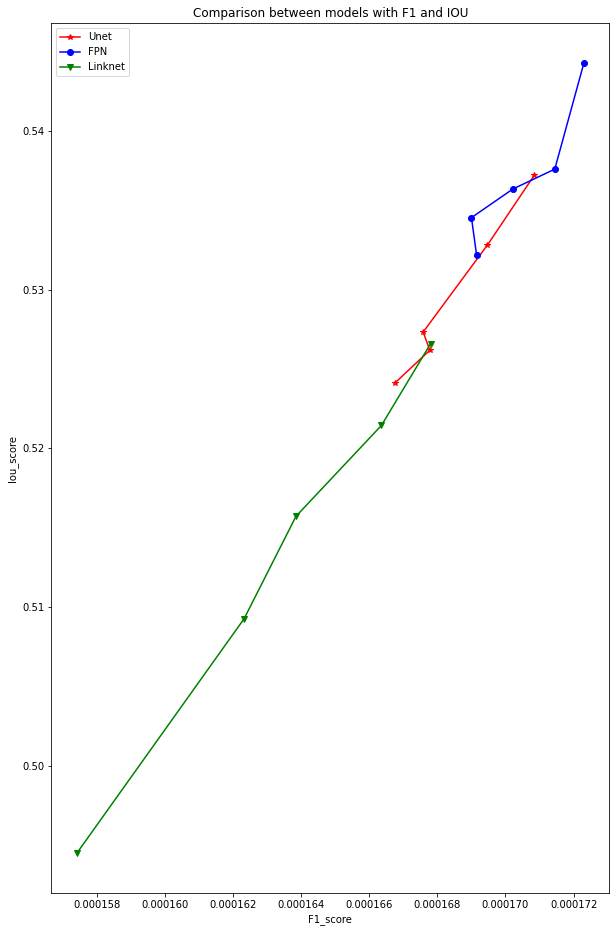

In [246]:
plt.figure(figsize=(10,16))
plt.plot(df.sort_values('Iou_score',axis = 0,ascending=False).F1_score[df.model == 'Unet']/3600, df.sort_values('Iou_score',axis = 0,ascending=False).Iou_score[df.model == 'Unet'],marker='*',color='r',)
plt.plot(df.sort_values('Iou_score',axis = 0,ascending=False).F1_score[df.model == 'FPN']/3600, df.sort_values('Iou_score',axis = 0,ascending=False).Iou_score[df.model == 'FPN'],marker='o',color='b')
plt.plot(df.sort_values('Iou_score',axis = 0,ascending=False).F1_score[df.model == 'Linknet']/3600, df.sort_values('Iou_score',axis = 0,ascending=False).Iou_score[df.model == 'Linknet'],marker='v',color='g')
plt.legend(['Unet','FPN','Linknet'])
plt.xlabel('F1_score')
plt.ylabel('Iou_score')
plt.title('Comparison between models with F1 and IOU')
plt.savefig('F1_IOU.png')

<Figure size 4000x8000 with 0 Axes>

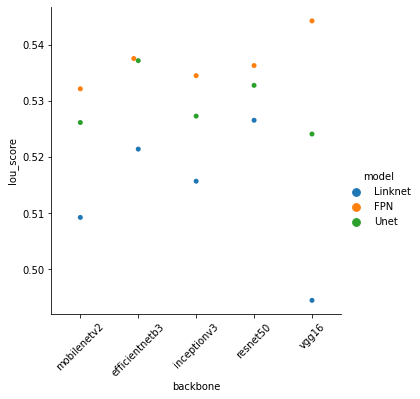

In [242]:
plt.figure(figsize=(20,40),dpi=200)
sns.catplot(x="backbone", y="Iou_score", hue="model", kind="swarm", data=df)
plt.xticks(rotation=45)
plt.savefig('IoU_score_catplot.png')
plt.show()

<Figure size 4000x8000 with 0 Axes>

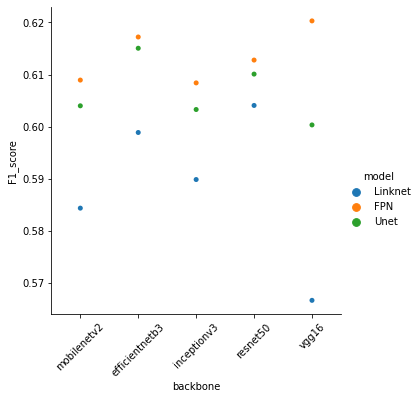

In [243]:
plt.figure(figsize=(20,40),dpi=200)
sns.catplot(x="backbone", y="F1_score", hue="model", kind="swarm", data=df)
plt.xticks(rotation=45)
plt.savefig('F1_score_catplot.png')
plt.show()

<Figure size 4000x8000 with 0 Axes>

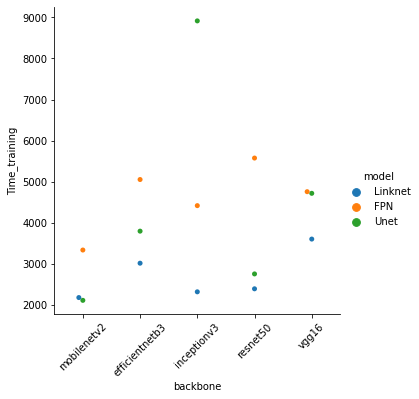

In [244]:
plt.figure(figsize=(20,40),dpi=200)
sns.catplot(x="backbone", y="Time_training", hue="model", kind="swarm", data=df)
plt.xticks(rotation=45)
plt.savefig('time_catplot.png')
plt.show()

In [245]:
color = [(1,0,1),(1,0,0),(0,1,0),(0,0,1),(1,1,0)]
marker = itertools.cycle((',', '+', '.', 'o', '*')) 